In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

##  <font color = 'red'> **Dataset 1: FUEL CONSUMPTION** </font>

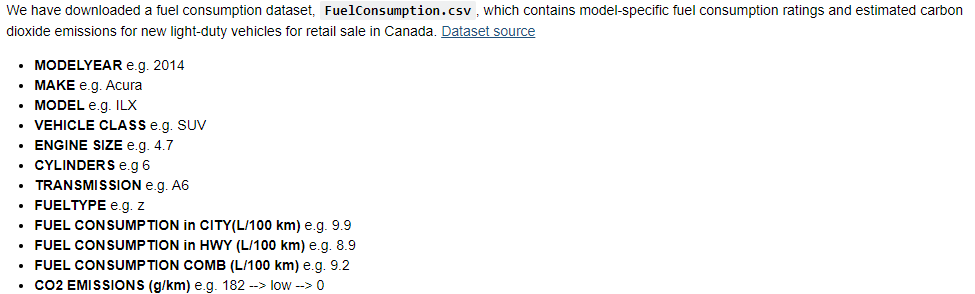

In [5]:
df=pd.read_csv('FuelConsumptionDataset.csv')

## **STEP 0: DATA EXPLORATION**

In [6]:

df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


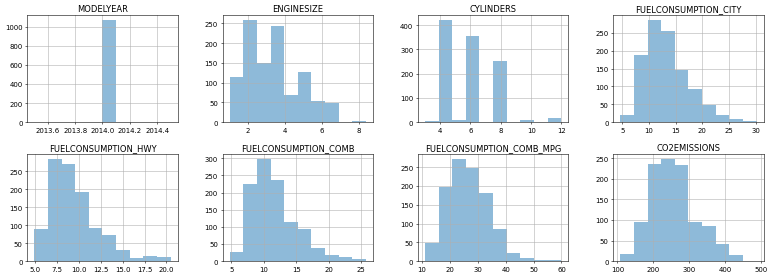

In [7]:
fig, ax = plt.subplots(figsize=(19,10), dpi=50);
df.hist(ax=ax, layout=(3,4), alpha=0.5);

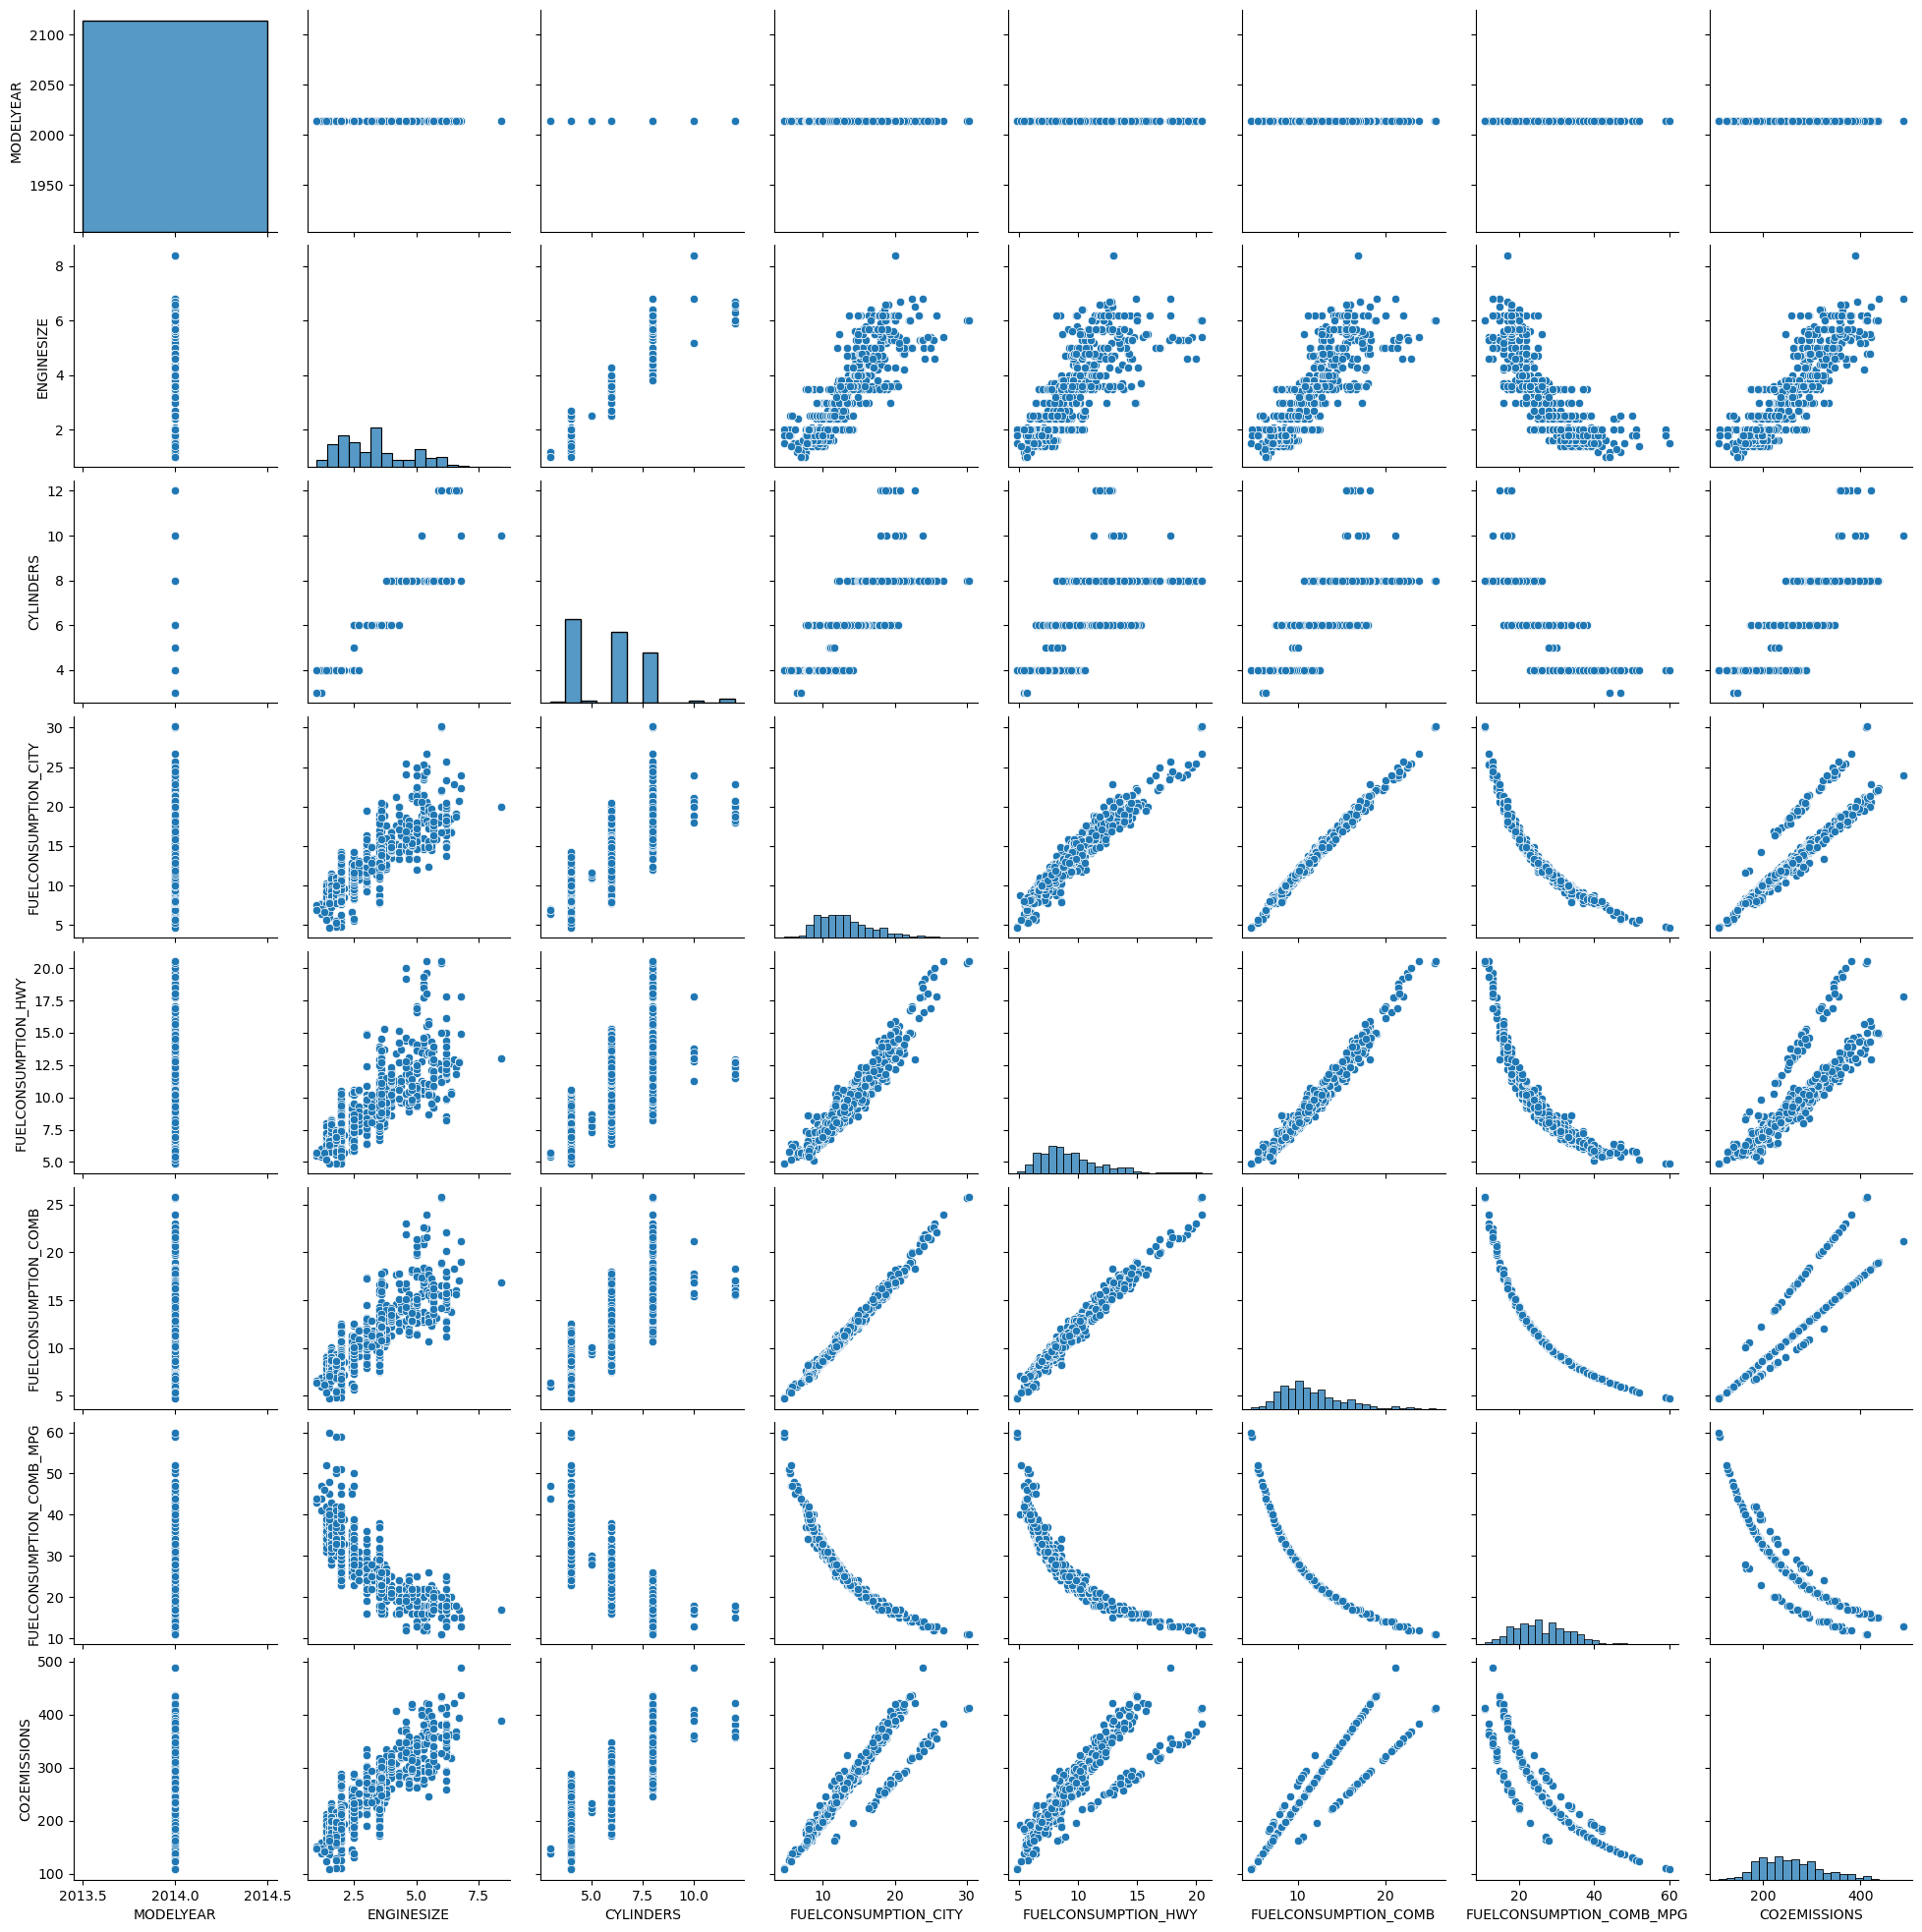

In [9]:
sns.pairplot(df)

<Axes: >

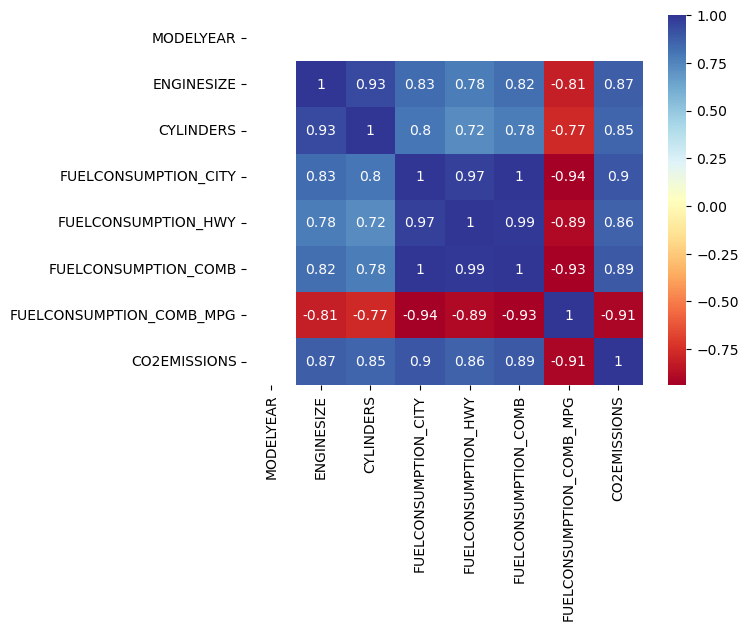

In [10]:
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='RdYlBu' )

## **STEP 1: PRE-PROCESSING**
REMOVING NULL-VALUES AND OUTLIERS

**1. Determing null values**

In [11]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

**2. Determining Outliers**

<Axes: >

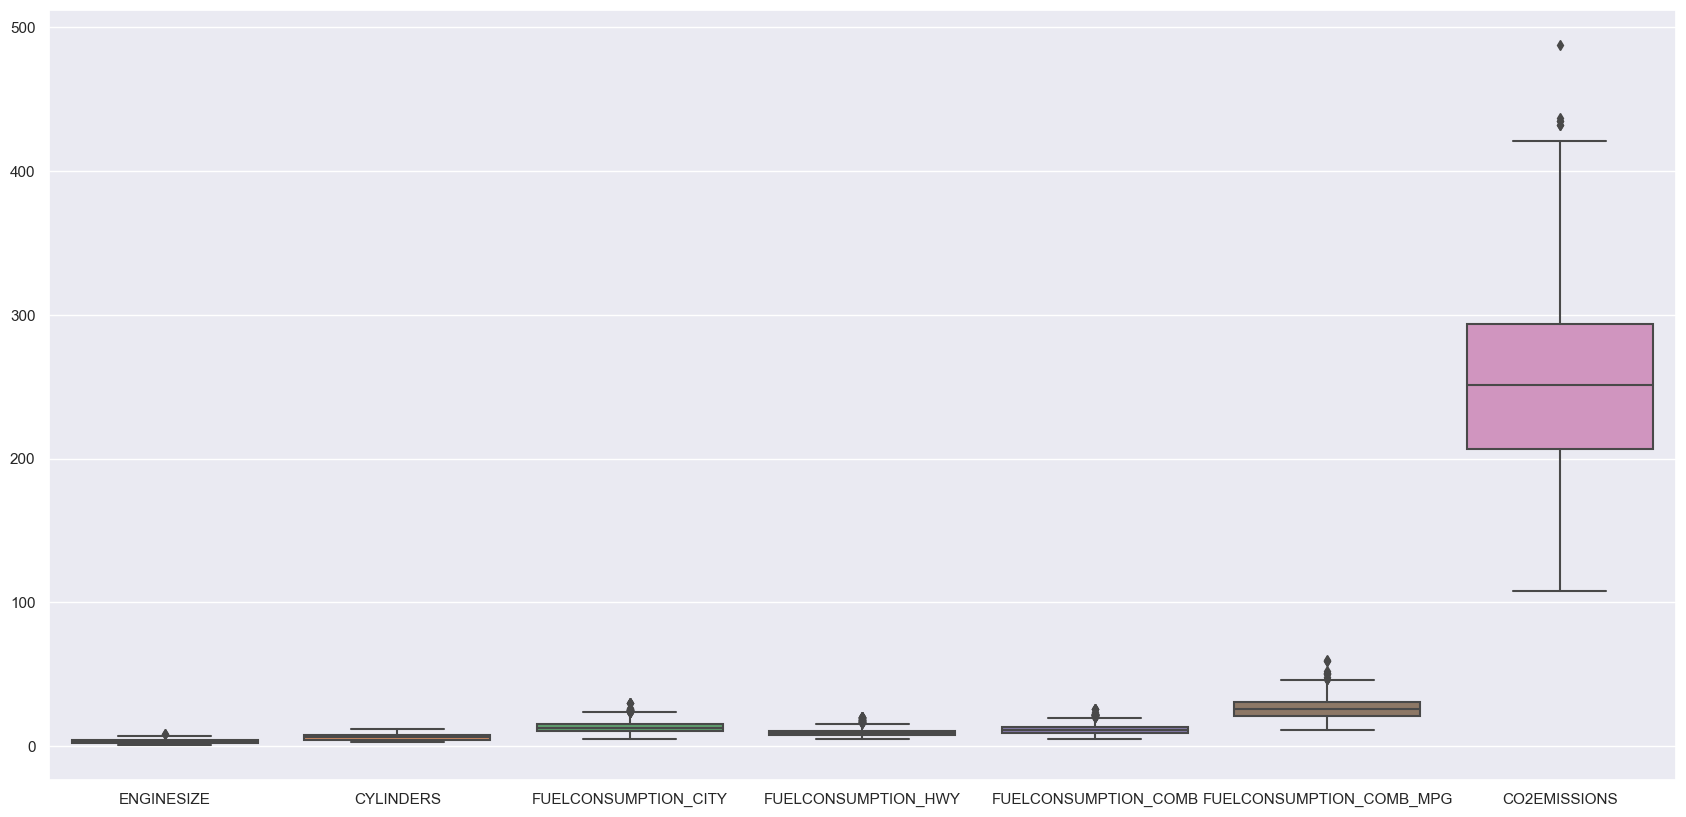

In [12]:
sns.set(rc={'figure.figsize':(21,10)})
sns.boxplot(data=df.iloc[:,1:])

<Axes: >

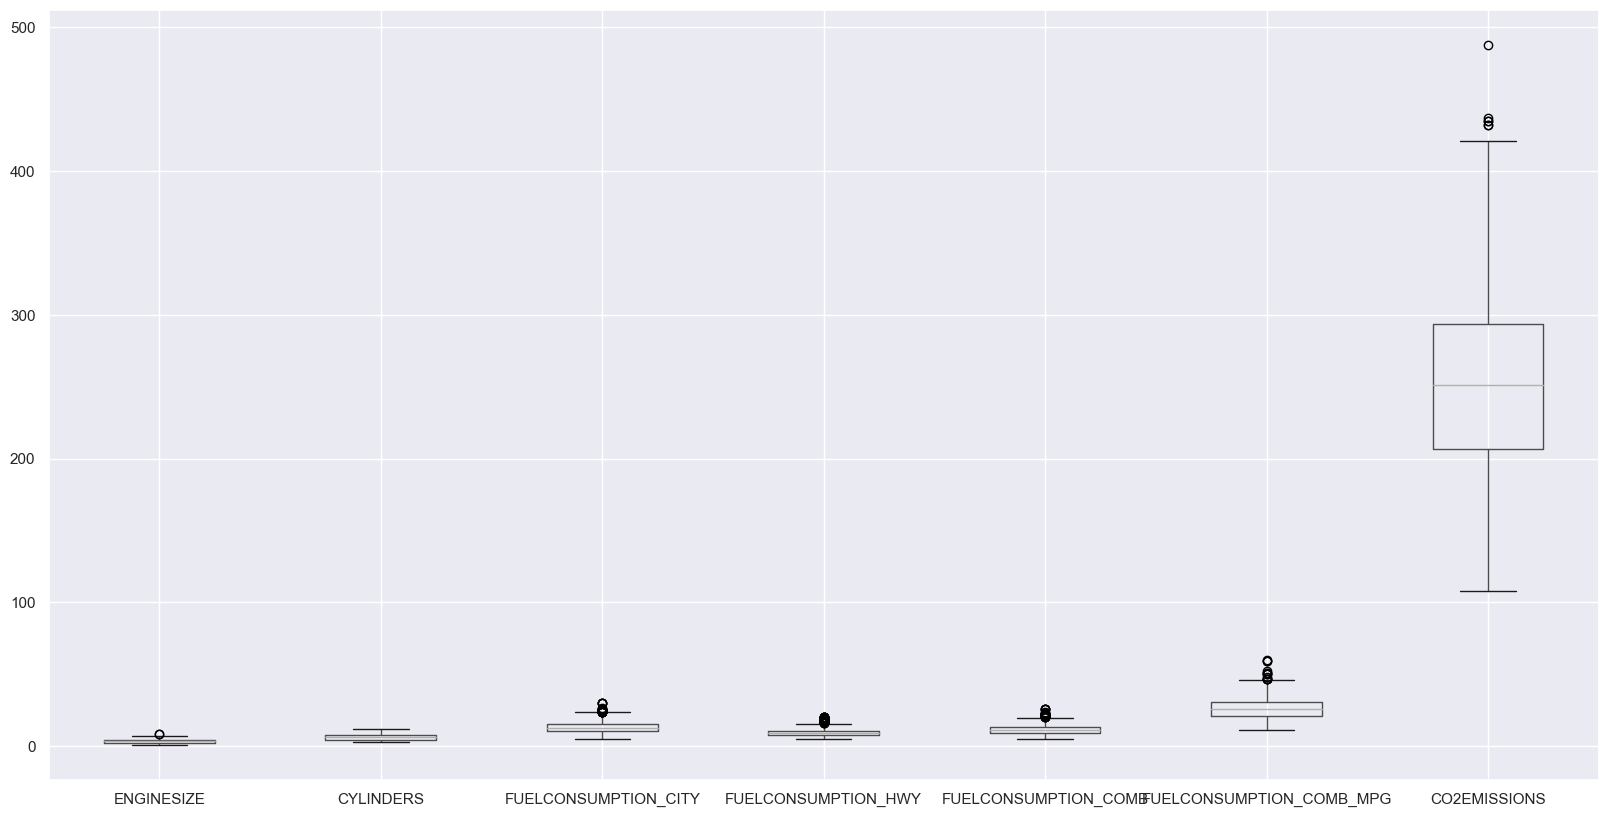

In [13]:
df.iloc[:,1:].boxplot(figsize=(20,10))

## **STEP 2: TRAIN-TEST SPLIT and Feature Scaling (Part of Pre-processing)**

In [14]:
#features = 'ENGINESIZE'
# features =  ['ENGINESIZE', 'FUELCONSUMPTION_COMB']
X = df['ENGINESIZE'].values
Y = df['CO2EMISSIONS'].values

**FEATURE SCALING/ Standardization/ Normalization**

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

print("Mean and Standard Deviation Before")
print(X.mean(), X.std())

XScaled=(X-X.mean())/(X.std())

print("Mean and Standard Deviation After")
print(XScaled.mean(), XScaled.std())

Mean and Standard Deviation Before
3.346298031865042 1.4152314024298263
Mean and Standard Deviation After
2.6637028519591385e-17 1.0


**Train-Test Split**

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.80,random_state=25,shuffle=True)
print("Dimensions of Original Data:")
print("Size(X):", X.shape, "; Size(Y)", Y.shape)
print("Dimensions of Training Data:")
print("Size(X_train):", X_train.shape, "; Size(Y_train)", Y_train.shape)
print("Dimensions of Test Data:")
print("Size(X_test):", X_test.shape, "; Size(Y_test)", Y_test.shape)

Dimensions of Original Data:
Size(X): (1067,) ; Size(Y) (1067,)
Dimensions of Training Data:
Size(X_train): (853,) ; Size(Y_train) (853,)
Dimensions of Test Data:
Size(X_test): (214,) ; Size(Y_test) (214,)


#### HELP MODULE [NORMALIZATION!!!]

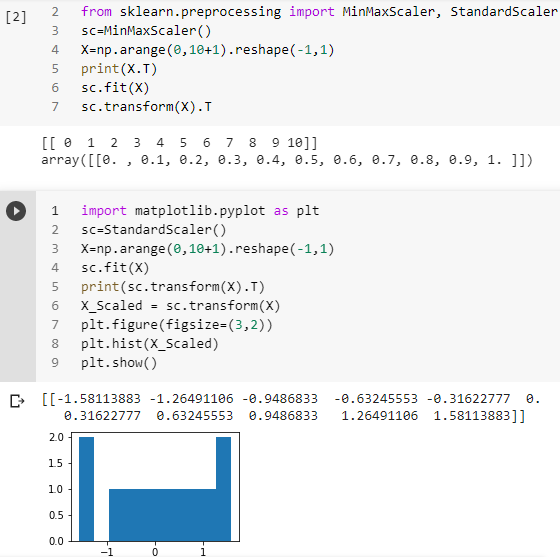

## **STEP 3: FITTING LINEAR REGRESSION MODEL ON TRAINING DATA**

### <font color='red'>**3.1 UNIVARIATE LINEAR REGRESSION**</font>

In [17]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

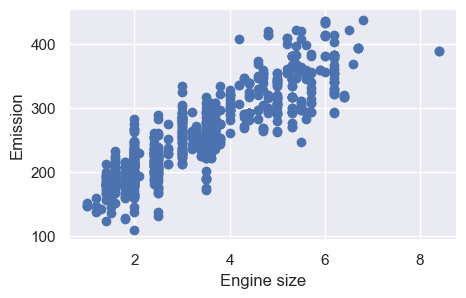

In [18]:
X = X_train
Y = Y_train
sns.set(rc={'figure.figsize':(5,3)})
plt.scatter(x = X, y = Y)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<font color='blue'>**A. ESTIMATING PARAMETERS USING ORDINARY LEAST SQUARE METHOD**:</font>
   
    Y_PRED = WX + B

    W = summation(x_i-x_mean)(y_i-y_mean) / summation(x_i-x_mean)^2
    B = y_mean - W*x_mean

In [19]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)
W = ((X-X.mean())*(Y-Y.mean())).sum()/((X-X.mean())**2 ).sum()
B = Y.mean()-W*X.mean() 
print("Weight/Slope W:", W)
print("Bias/Intercept B:", B)

Weight/Slope W: 39.30073204206602
Bias/Intercept B: 125.56880015835392


Mean Squared Error (MSE): 896.14
Root Mean Squared Error(RMSE): 29.94
R squared error (R2): 0.71


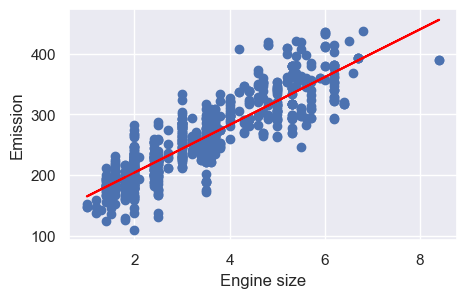

In [20]:
from sklearn import metrics
Y_PRED = np.dot(W,X) + B
# REGRESSION EVALUATION METRICS!!!
print("Mean Squared Error (MSE): %.2f" % np.mean((Y_PRED - Y) ** 2))# metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared Error(RMSE): %.2f" % np.sqrt(np.mean((Y_PRED - Y) ** 2)))
print('R squared error (R2): %.2f' % metrics.r2_score(Y_PRED, Y))
#R-squared is not error, but is a popular metric for accuracy of your model.
#It represents how close the data are to the fitted regression line.
#The higher the R-squared, the better the model fits your data. Best possible score is 1.0
plt.scatter(x = X, y = Y)
plt.plot(X, Y_PRED, color  = "red")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<font color='blue'> **B. NORMAL EQUATION METHOD** </font>

$W = (X^TX)^{−1} X^TY$


Weight/Slope W: 39.300732042066045
Bias/Intercept B: 125.56880015835395
764404.520760957
Mean Squared Error (MSE): 896.14
Root Mean Squared Error(RMSE): 29.94
R squared error (R2): 0.71
(853,) (853,) (853,)


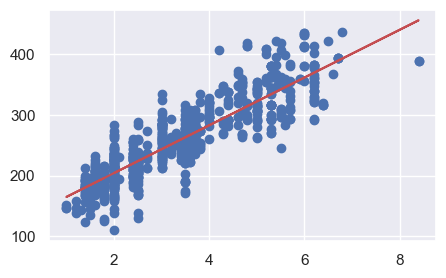

In [21]:
##### TO DO
##### 1. FIND PARAMETERS W AND B
##### The values should match the ones obtained above
import math
X=df[['ENGINESIZE']]
X['intercept']=1
Y = df['CO2EMISSIONS']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.80,random_state=25,shuffle=True)
X = X_train
Y = Y_train
X.reindex(['intercept','ENGINESIZE'])
XT=X.T
mat=np.matmul(XT,X) 
mat1=np.matmul(XT,Y)
W=np.matmul(np.linalg.inv(mat),mat1)
print("Weight/Slope W:", W[0])
print("Bias/Intercept B:", W[1])
print(sum([d**2 for d in (Y-(W[0]*X['ENGINESIZE']+W[1]))]) )
##### 2. Find value of Regression Evaluation Metrics: MSE, RMSE, R2
##### 3. Plot the data and regression line
from sklearn import metrics
Y_PRED = X['ENGINESIZE']*W[0] + W[1]
print("Mean Squared Error (MSE): %.2f" % np.mean((Y - Y_PRED) ** 2))# metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared Error(RMSE): %.2f" % np.sqrt(np.mean((Y - Y_PRED) ** 2)))
print('R squared error (R2): %.2f' % metrics.r2_score(Y_PRED, Y))

plt.scatter(X['ENGINESIZE'],Y)
plt.plot(X['ENGINESIZE'],Y_PRED,'r')  
print(X['ENGINESIZE'].shape,Y.shape,Y_PRED.shape)

<font color='blue'> **C. GRADIENT DESCENT METHOD** </font>

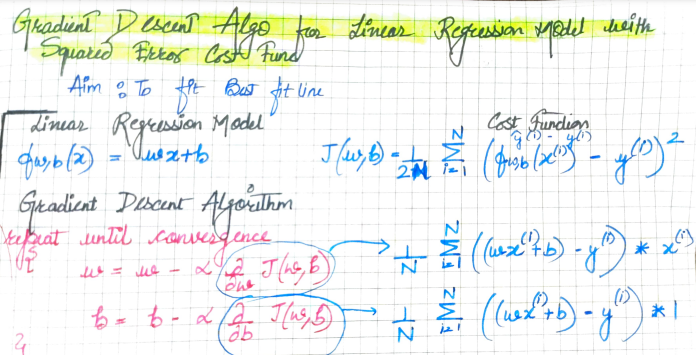

In [22]:
X=df['ENGINESIZE']
N=float(len(Y))
Y = df['CO2EMISSIONS']

In [23]:
Y=np.array(Y)
def computeCost(X, Y, w, b):
    J=sum([d**2 for d in (Y-(w*X+b))])/N
    return J

def gradientDescent (X, Y,learningRate, numIterations,w=0,b=0):
    errorList =pd.DataFrame(columns=['W','B','Cost']) ### Store cost in each iteration
    for i in range(numIterations):
        Y_pred = b + w*X
        wi=(-2/N)*sum(X*(Y-Y_pred))
        bi=(-2/N)*sum((Y-Y_pred))
        w=w-(learningRate*wi)
        b=b-(learningRate*bi)
        costJ = computeCost(X, Y, w, b)
        errorList.loc[i]=[w,b,costJ]
    return errorList


**Case 1: Using very low learning rate, say alpha=0.0001**

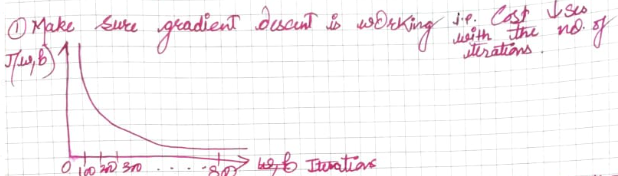

<Axes: xlabel='index'>

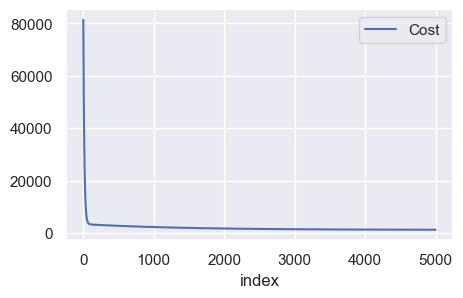

In [24]:
m = gradientDescent (X, Y, 0.001, numIterations=5000)
# Match w and b against the ones obtained in A and B part
# Plot iteration vs error
m.reset_index().plot.line(x='index',y=['Cost'])

**Case 2: Using very low learning rate, say alpha=0.1**

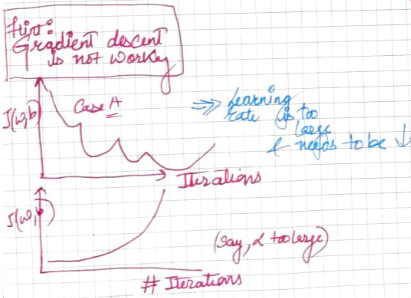

<Axes: xlabel='index'>

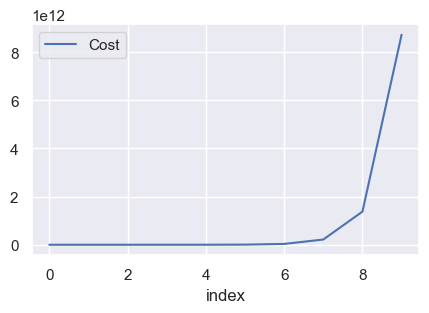

In [25]:
m= gradientDescent (X, Y, 0.1, numIterations=10)
# Match w and b against the ones obtained in A and B part
# Plot iteration vs error
m.reset_index().plot.line(x='index',y=['Cost'])

### <font color='red'>**3.2 MULTIPLE-VARIABLE LINEAR REGRESSION: FEATURES- ['ENGINESIZE', 'FUELCONSUMPTION_COMB']**</font>

In [26]:
X = X_train
Y = Y_train
print(X.shape, Y.shape)

(853, 2) (853,)


<font color='blue'> **ESTIMATE REGRESSION COEFFICIENTS BY REPEATING B PART: NORMAL EQUATION METHOD FOR X_train:** </font>

Weight/Slope W 1: 20.45002924659201
Weight/Slope W 2: 9.213450332288176
Bias/Intercept B: 81.45133792391152
Mean Squared Error (MSE): 545.83
Root Mean Squared Error(RMSE): 23.36
R squared error (R2): 0.84


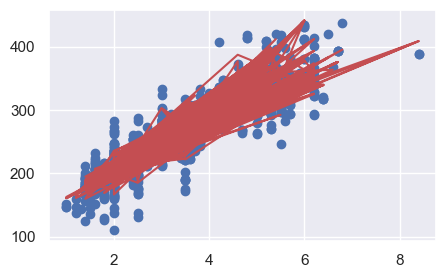

In [27]:
##### TO DO
X=df[['ENGINESIZE','FUELCONSUMPTION_COMB']]
X['intercept']=1
Y = df['CO2EMISSIONS']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.80,random_state=25,shuffle=True)
X = X_train
Y = Y_train
X.reindex(['intercept','ENGINESIZE','FUELCONSUMPTION_COMB'])
XT=X.T
mat=np.matmul(XT,X)
mat1=np.matmul(XT,Y)
W=np.matmul(np.linalg.inv(mat),mat1)
print("Weight/Slope W 1:", W[0])
print("Weight/Slope W 2:", W[1])
print("Bias/Intercept B:", W[2])
# print(sum([d**2 for d in (Y-(W[0]*X['ENGINESIZE']+W[1]))])/N)
##### 2. Find value of Regression Evaluation Metrics: MSE, RMSE, R2
##### 3. Plot the data and regression line
from sklearn import metrics
Y_PRED = X['ENGINESIZE']*W[0] + W[1]*X['FUELCONSUMPTION_COMB']+W[2]
print("Mean Squared Error (MSE): %.2f" % np.mean((Y - Y_PRED) ** 2))# metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared Error(RMSE): %.2f" % np.sqrt(np.mean((Y - Y_PRED) ** 2)))
print('R squared error (R2): %.2f' % metrics.r2_score(Y_PRED, Y))

plt.scatter(X['ENGINESIZE'],Y)
plt.plot(X['ENGINESIZE'],Y_PRED,'r')

<font color='blue'> **ESTIMATE REGRESSION COEFFICIENTS BY REPEATING C PART: GRADIENT DESCENT METHOD FOR X_train:** </font>

In [28]:
##### TO DO


*Optional: Try if you can come up with predicted equation represented through plane and points referring to dataset [Reference: Ankit]*
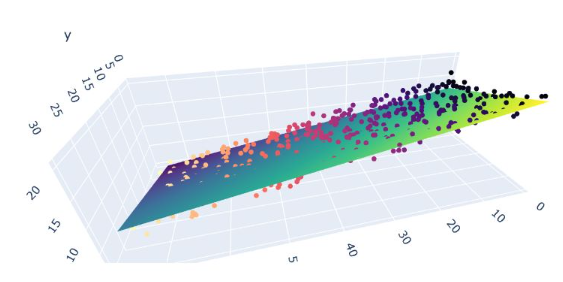

### <font color='red'>**3.3 LINEAR REGRESSION USING PRE-DEFINED LinearRegression Class**</font>

In [29]:
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
LRModel.fit(X_train,Y_train)

LinearRegression()

In [30]:
print("Weight/Slope W [W1, W2]:", LRModel.coef_)
print("Bias/Intercept B:", LRModel.intercept_)
# coeff_df = pd.DataFrame(LRModel.coef_,columns=['Coefficient'])
# coeff_df


Weight/Slope W [W1, W2]: [20.45002925  9.21345033  0.        ]
Bias/Intercept B: 81.45133792391107


## **STEP 4:Evaluating Performance of Model**

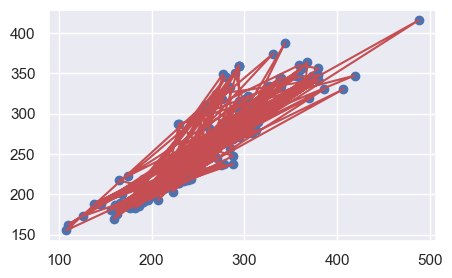

In [31]:
Y_pred = LRModel.predict(X_test)
plt.scatter(Y_test,Y_pred)
plt.plot(Y_test,Y_pred,'r')

<font color='blue'>**PERFORMANCE ON TEST PARTITION**</font>

In [32]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE: 18.41142998941244
MSE: 666.797248842364
RMSE: 25.82241756386036
